# Lesson 2: Maps and More Geographies

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

## Imports and Configuration

In [1]:
import censusdis.data as ced
from censusdis.datasets import ACS5
import censusdis.states as states

from matplotlib.ticker import FuncFormatter

In [2]:
MEDIAN_HOUSEHOLD_INCOME_VARIABLE = "B19013_001E"

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

## Query Geometry along with Data

Often, we'd like to plot our data on a map. So we need to know what each state looks like and where it is.
We can add `with_geometry=True` to our query to get what we need.

- The return value is now a `geopandas.GeoDataFrame`
- This is an extension of a `pandas.DataFrame` that adds `geometry` to each row.

In [3]:
gdf_all_states = ced.download(
    dataset='acs/acs5',
    vintage=2020,
    download_variables=['NAME', 'B19013_001E'], 
    
    state='*',
    
    # We want the geometry of the states too:
    with_geometry=True
)

gdf_all_states.head()

,STATE,NAME,B19013_001E,geometry
0,42,Pennsylvania,63627,"POLYGON ((-80.51989 40.90666, -80.51963 40.911..."
1,06,California,78672,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987..."
2,54,West Virginia,48037,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."
3,49,Utah,74197,"POLYGON ((-114.05296 37.59278, -114.05247 37.6..."
4,36,New York,71117,"MULTIPOLYGON (((-79.76215 42.24305, -79.76196 ..."


<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

### Plot the Results on a Map

- `cem.plot_us` 
  - Conveniently projects the United States
  - Relocates AK, HI, and PR for a more compact display

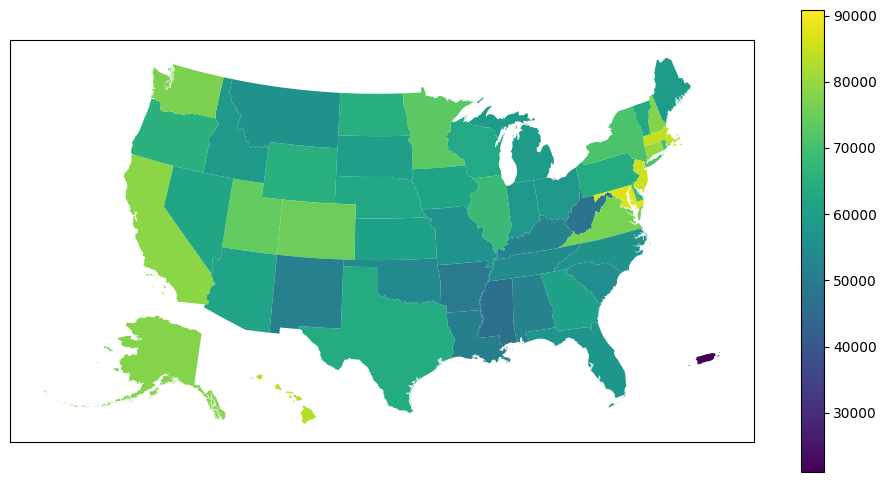

In [4]:
import censusdis.maps as cem

ax = cem.plot_us(
    gdf_all_states,
    MEDIAN_HOUSEHOLD_INCOME_VARIABLE,
    
    # The **kwargs here are standard Matplotlib **kwargs
    legend=True,
    figsize=(12, 6)
)

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

### Styling the Map

- We can add a variety of styling to the map.
- Any args Matplotlib can take, we can pass through.

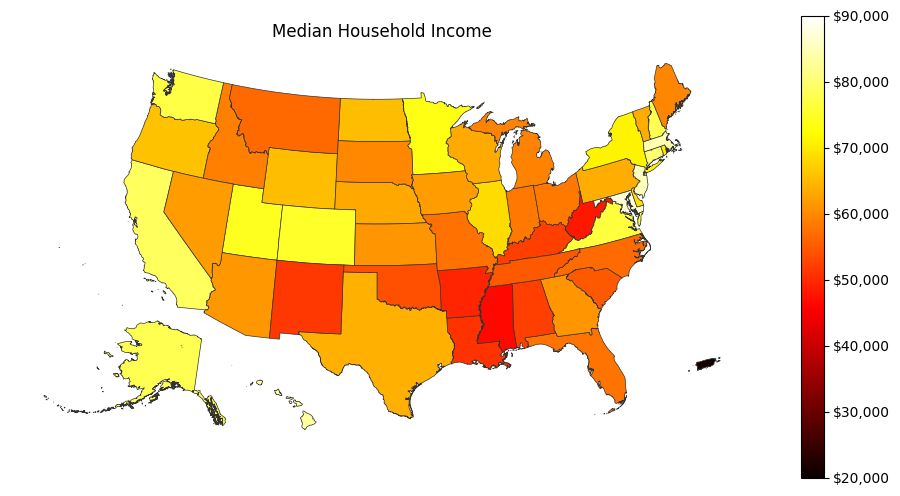

In [5]:
ax = cem.plot_us(
    gdf_all_states,
    MEDIAN_HOUSEHOLD_INCOME_VARIABLE,

    # Styling with Matplotlib **kwargs
    cmap='hot',
    edgecolor='#333',
    linewidth=0.5,
    vmin=20_000,
    vmax=90_000,
        
    legend=True,
    figsize=(12, 6),

    legend_kwds={"format": FuncFormatter(lambda x, pos: f"${x:,.0f}")},
)

ax.set_title("Median Household Income")
ax.axis('off')
None

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

## What other Geographies are Available?

### Start with States
Just as we have already done.

In [6]:
gdf_states = ced.download(
    dataset=ACS5,
    vintage=2022,
    download_variables=['NAME'],
    
    # All the states, as we have done before
    state="*",
    
    with_geometry=True  
)

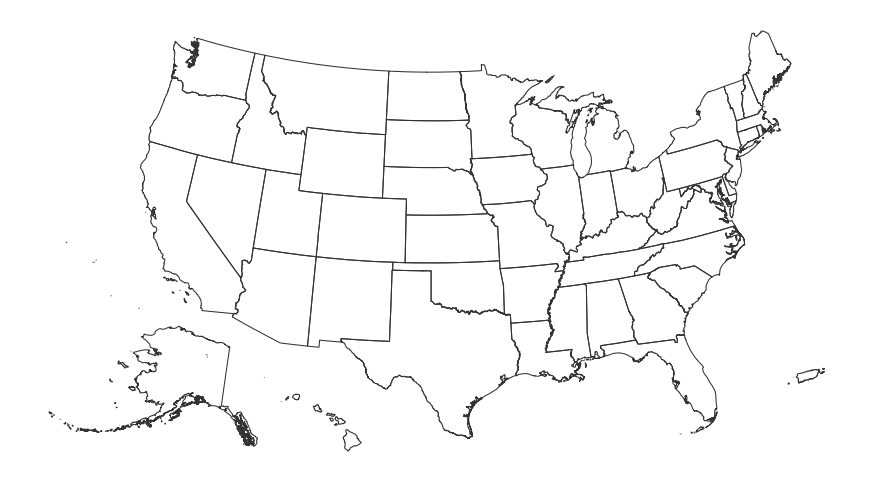

In [7]:
ax = cem.plot_us_boundary(gdf_states, linewidth=0.75, color='#333', figsize=(12, 6))
ax.axis('off')
None

<br/><br/><br/><br/><br/><br/><br/><br/>
<br/><br/><br/><br/><br/><br/><br/><br/>

### Counties

We choose the state but use the wildcard `county='*'`.

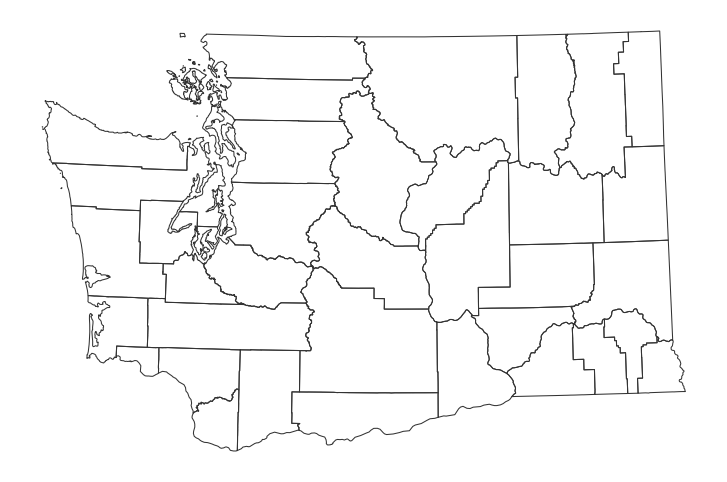

In [8]:
gdf_counties = ced.download(
    dataset=ACS5,
    vintage=2022,
    download_variables=['NAME'],
    
    # All the counties in Washington State.
    state=states.WA,
    county="*",
    
    with_geometry=True
)

ax = cem.plot_map(gdf_counties.boundary, linewidth=0.75, color='#333', figsize=(12, 6))
ax.axis('off')
None

<br/><br/><br/><br/><br/><br/><br/><br/>
<br/><br/><br/><br/><br/><br/><br/><br/>

### We are interested in Pierce County

In [9]:
from censusdis.counties.washington import PIERCE

<br/><br/><br/><br/><br/><br/><br/><br/>
<br/><br/><br/><br/><br/><br/><br/><br/>

### Census Tracts

- Tracts typically have 1-5,000 residents
- There are ~80,000 tracts in the U.S.

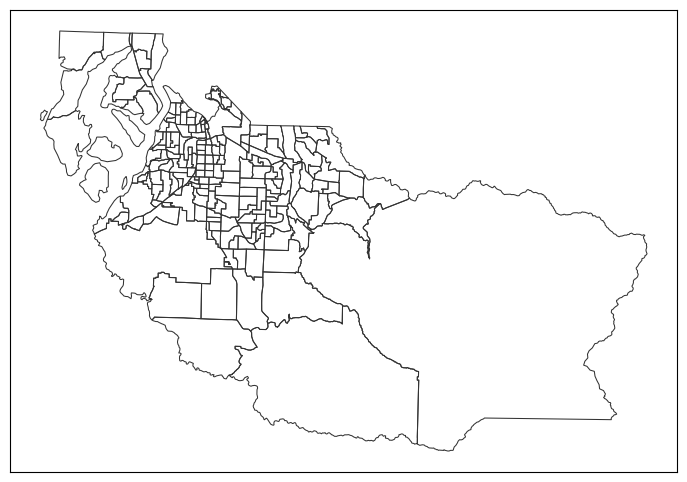

In [10]:
gdf_tracts = ced.download(
    dataset=ACS5,
    vintage=2022,
    download_variables=['NAME'],
    
    # All the census tracts in Pierce County
    state=states.WA,
    county=PIERCE,
    tract="*",
    
    with_geometry=True
)

ax = cem.plot_map(
    gdf_tracts.boundary,
    linewidth=0.75, 
    color='#333', 
    figsize=(12, 6),
)

None

<br/><br/><br/><br/><br/><br/><br/><br/>
<br/><br/><br/><br/><br/><br/><br/><br/>

### Block Groups

- This is the finest level of geography in ACS data.

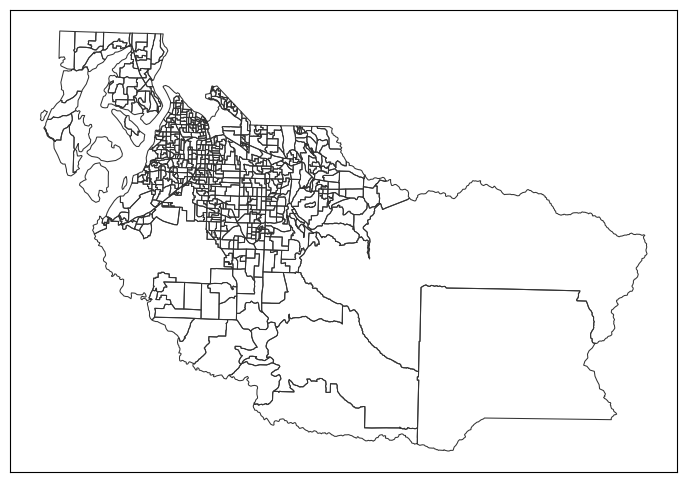

In [11]:
df_block_group = ced.download(
    dataset=ACS5,
    vintage=2022,
    download_variables=['NAME'],
    
    # All the block groups in Pierce County, WA
    state=states.WA,
    county=PIERCE,
    tract="*",
    block_group="*",
    
    with_geometry=True
)

ax = cem.plot_map(
    df_block_group.boundary, 
    linewidth=0.75, 
    color='#333', 
    figsize=(12, 6),
)
None

<br/><br/><br/><br/><br/><br/><br/><br/>
<br/><br/><br/><br/><br/><br/><br/><br/>

## Plot Data at the Census Tract Level

In [12]:
from censusdis.values import ALL_SPECIAL_VALUES

gdf_tract = ced.download(
    dataset=ACS5,
    vintage=2022,
    download_variables=['NAME', MEDIAN_HOUSEHOLD_INCOME_VARIABLE], 
   
    state=states.WA,
    county=PIERCE,
    tract="*",
    
    with_geometry=True,
)

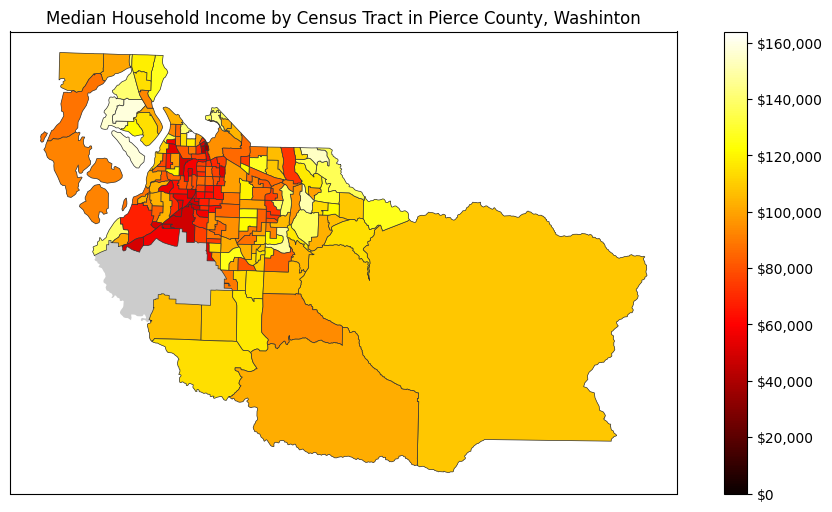

In [13]:
# First plot a neutral background color everywhere.
ax = cem.plot_map(
    gdf_tract,
    color='#ccc',
    figsize=(12, 6)
)

# On top of that, plot median housuehold income
# for the non-NaN block groups.
ax = cem.plot_map(
    gdf_tract,
    'B19013_001E',
    
    cmap='hot',
    edgecolor='#333',
    linewidth=0.5,
    vmin=0,

    legend=True,
    legend_kwds={"format": FuncFormatter(lambda x, pos: f"${x:,.0f}")},

    ax=ax,
)

ax.set_title("Median Household Income by Census Tract in Pierce County, Washinton")
None

<br/><br/><br/><br/><br/><br/><br/><br/><br/>
<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## What is the gray area?

Let's look at a background map from OpenStreetMap to find out.

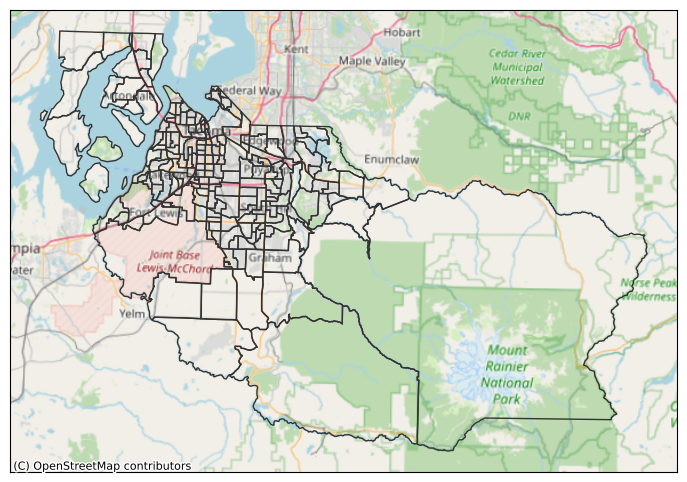

In [14]:
ax = cem.plot_map(
    gdf_tracts.boundary,
    linewidth=1.0, 
    color='#333', 
    figsize=(12, 6),

    # We can add a background to any map with 
    # this optional argument.
    with_background=True
)

<br/><br/><br/><br/><br/><br/><br/><br/><br/>
<br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Off-Spine Geography (And our first foray into metadata)

- *State - County - Tract - Block Group*, are referred to as *on-spine* geographies
- Not all geographies nest and cover all areas like on-spine geographies do.
- Those that don't are called *off-spine* geographies.
- We can query all available nested geometries, on and off-spine.
- All are valid combinations of geography kwargs.

<br/><br/><br/><br/><br/><br/><br/><br/>
<br/><br/><br/><br/><br/><br/><br/><br/>

<img src="../images/census_geos.png" alt="Census Geographies">

More details at https://www.census.gov/content/dam/Census/data/developers/geoareaconcepts.pdf.

<br/><br/><br/><br/><br/><br/><br/><br/>
<br/><br/><br/><br/><br/><br/><br/><br/>

### Query for geographies available for a dataset

Each element is a list that tells us a valid combination
of geography `kwargs`.

In [15]:
list(ced.geographies(ACS5, 2022))

[['us'],
 ['region'],
 ['division'],
 ['state'],
 ['state', 'county'],
 ['state', 'county', 'county_subdivision'],
 ['state', 'county', 'county_subdivision', 'subminor_civil_division'],
 ['state', 'county', 'county_subdivision', 'place_remainder_or_part'],
 ['state', 'county', 'tract'],
 ['state', 'county', 'tract', 'block_group'],
 ['state', 'place', 'county_or_part'],
 ['state', 'place'],
 ['state', 'consolidated_city'],
 ['state', 'consolidated_city', 'place_or_part'],
 ['state', 'alaska_native_regional_corporation'],
 ['american_indian_area_alaska_native_area_hawaiian_home_land'],
 ['american_indian_area_alaska_native_area_hawaiian_home_land',
  'tribal_subdivision_remainder'],
 ['american_indian_area_alaska_native_area_reservation_or_statistical_entity_only'],
 ['american_indian_area_off_reservation_trust_land_only_hawaiian_home_land'],
 ['american_indian_area_alaska_native_area_hawaiian_home_land',
  'tribal_census_tract'],
 ['american_indian_area_alaska_native_area_hawaiian_home

<br/><br/><br/><br/><br/><br/><br/><br/>
<br/><br/><br/><br/><br/><br/><br/><br/>

### Places in Washington State

- `['state', 'place']` was one of the entries in the list above. 
- It tells us that `state=` and `place=` are 
valid keywords to describe a geography.
- We will use them in the query below.
- Places are off-spine, so
  - Places do not cover the entire area of the state the way on-spine geometries do.
  - Every part of the state is in a county, a census tract, and a block group.
  - Not every part of the state is in a place.

In [16]:
gdf_wa_places = ced.download(
    ACS5,
    2022,
    ['NAME', MEDIAN_HOUSEHOLD_INCOME_VARIABLE], 
   
    # Query all places in Washington State.
    state=states.WA,
    place='*',
    
    with_geometry=True
)

gdf_wa_places.head()

,STATE,PLACE,NAME,B19013_001E,geometry
0,53,00100,"Aberdeen city, Washington",50008.0,"MULTIPOLYGON (((-123.69688 47.01895, -123.6966..."
1,53,00135,"Aberdeen Gardens CDP, Washington",NaN,"POLYGON ((-123.79560 47.05004, -123.78966 47.0..."
2,53,00275,"Acme CDP, Washington",NaN,"POLYGON ((-122.22005 48.72737, -122.21972 48.7..."
3,53,00380,"Addy CDP, Washington",NaN,"POLYGON ((-117.84418 48.36747, -117.83758 48.3..."
4,53,00800,"Ahtanum CDP, Washington",81354.0,"POLYGON ((-120.67102 46.55110, -120.66386 46.5..."


<br/><br/><br/><br/><br/><br/><br/><br/>
<br/><br/><br/><br/><br/><br/><br/><br/>

### Plot places

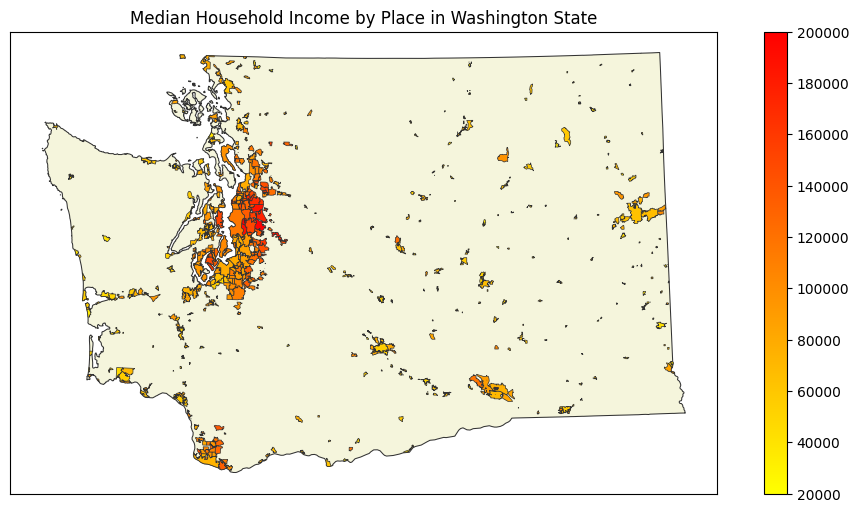

In [17]:
# Plot the whole state in a background color.
gdf_wa_state = gdf_states[gdf_states['STATE']==states.WA]

ax = cem.plot_map(
    gdf_wa_state, linewidth=0.75, color='beige', edgecolor='#333', figsize=(12, 6)
)

# Plot the places on top.
ax = cem.plot_map(
    gdf_wa_places,
    MEDIAN_HOUSEHOLD_INCOME_VARIABLE,

    cmap='autumn_r',
    edgecolor='#333',
    linewidth=0.5,
    
    vmin=20_000,
    vmax=200_000,
        
    figsize=(12, 6),
    legend=True,
    
    ax=ax
)

ax.set_title("Median Household Income by Place in Washington State")
None

#### Or if you prefer a background map

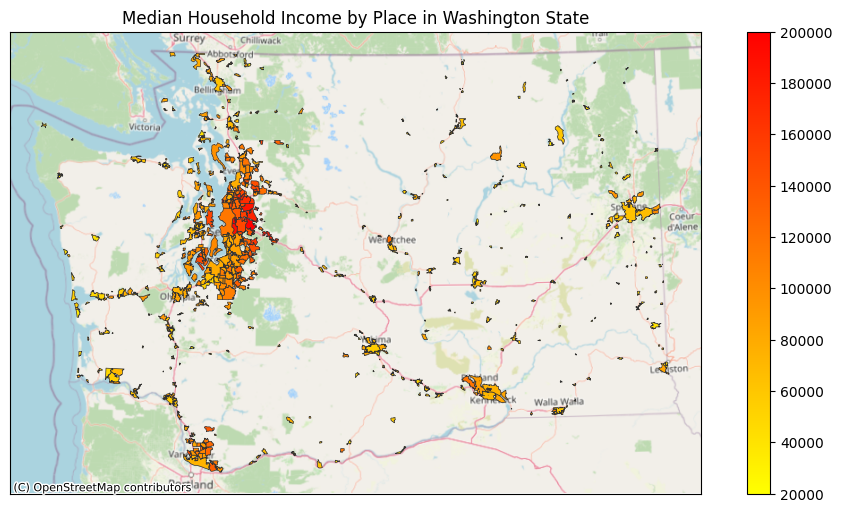

In [18]:
ax = cem.plot_map(
    gdf_wa_places,
    MEDIAN_HOUSEHOLD_INCOME_VARIABLE,

    cmap='autumn_r',
    edgecolor='#333',
    linewidth=0.5,
    
    vmin=20_000,
    vmax=200_000,
        
    figsize=(12, 6),
    legend=True,
    
    # Add a background map from 
    # Open Street Maps
    with_background=True
)

ax.set_title("Median Household Income by Place in Washington State")
None

<br/><br/><br/><br/><br/><br/><br/><br/>
<br/><br/><br/><br/><br/><br/><br/><br/>

### Query Core Based Statistical Areas (CBSAs) in the United States

- Metropolitan (population 50,000+) and Micropolitan (population 10,000-50,000) areas are collectively know as [Core Based Statistical Areas](https://en.wikipedia.org/wiki/Core-based_statistical_area) (CBSAs)
- Our list of geographies included `['metropolitan_statistical_area_micropolitan_statistical_area']`
- Note that this was standalone, not nested in a state like `place` was.
- CBSAs represent greater micro/metropolitan areas
- They may cross state lines

In [19]:
# Note: 'B03002_001E' is the variable for total population.
TOTAL_POPULATION_VARIABLE = 'B03002_001E'

gdf_cbsa = ced.download(
    dataset=ACS5,
    # I am going back to 2021 because 2022 
    # geographies for CBSAs are not available yet.
    vintage=2021,
    
    download_variables=[
        'NAME', 
        MEDIAN_HOUSEHOLD_INCOME_VARIABLE,
        TOTAL_POPULATION_VARIABLE
    ], 
   
    # Query all CBSAs in the country.
    metropolitan_statistical_area_micropolitan_statistical_area='*',
    
    with_geometry=True
)

In [20]:
# We want the n largest CBSAs by population.
n = 100
gdf_large_cbsa = gdf_cbsa.nlargest(n, TOTAL_POPULATION_VARIABLE)

<br/><br/><br/><br/><br/><br/><br/><br/>
<br/><br/><br/><br/><br/><br/><br/><br/>

### Plot the Largest CBSAs

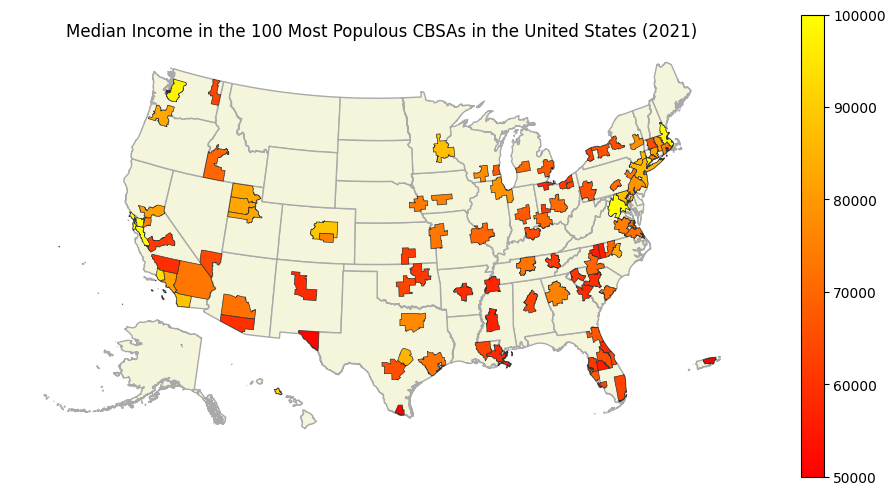

In [21]:
ax = cem.plot_us(
    gdf_states,
    color='beige',
    edgecolor='darkgrey',
    figsize=(12,6)
)

ax = cem.plot_us(
    gdf_large_cbsa,
    MEDIAN_HOUSEHOLD_INCOME_VARIABLE,

    cmap='autumn',
    edgecolor='#333',
    linewidth=0.5,
    vmin=50_000,
    vmax=100_000,
        
    legend=True,
    
    ax=ax
)

ax.axis('off')
_ = ax.set_title(f'Median Income in the {n} Most Populous CBSAs in the United States (2021)')

<br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Not all data sets support the same geographies

Let's look at `DECENNIAL_PUBLIC_LAW_94_171` which is a decennial [Public Law 94-171](https://www.census.gov/programs-surveys/decennial-census/data/datasets.html) data 
set used for redistricting for federal and state legislative districts.

The newest vintage of `DECENNIAL_PUBLIC_LAW_94_171l` has more geographies than `ACS5`, but the older vintages
have fewer. 

ACS5 has had varied numbers of geographies in over the years.

In [22]:
from censusdis.datasets import DECENNIAL_PUBLIC_LAW_94_171

In [23]:
acs5_geos = {
    vintage: len(ced.geographies(ACS5, vintage))
    for vintage in range(2010, 2021)
}

acs5_geos

{2010: 81,
 2011: 82,
 2012: 80,
 2013: 87,
 2014: 87,
 2015: 87,
 2016: 87,
 2017: 85,
 2018: 85,
 2019: 87,
 2020: 87}

In [24]:
dec_pl_geos = {
    vintage: len(ced.geographies(DECENNIAL_PUBLIC_LAW_94_171, vintage))
    for vintage in range(2000, 2021, 10)
}

dec_pl_geos

{2000: 28, 2010: 83, 2020: 96}

<br/><br/><br/><br/><br/><br/><br/><br/><br/>